### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [130]:
data = pd.read_csv('data/coupons.csv')

In [131]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [ ]:
#Let's find if car ownership has any effect on coupon usage
dfNoCar = data[data['car'].isnull()]
print(f"Number of entries with no car: {len(dfNoCar)}")

#Total of 12576 data entries have no car information on this dataset. It means that Car information is not significantly impacting the coupon usage and can be ignored for cleaning.

Number of entries with no car: 12576


In [133]:
#Let's find nulls for other columns
BarNulls = data[data['Bar'].isnull()]
print(len(BarNulls))#107 entries have no Bar information

CoffeeHouseNulls = data[data['CoffeeHouse'].isnull()]
print(len(CoffeeHouseNulls))#217 entries have no CoffeeHouse information

LessThan20Nulls = data[data['RestaurantLessThan20'].isnull()]
print(len(LessThan20Nulls))#130 entries have no entries for "Restaurants less than 20" information

Restaurant20To50Nulls = data[data['Restaurant20To50'].isnull()]
print(len(Restaurant20To50Nulls))#189 entries have no entries for "Restaurants 20 to 50" information


107
217
130
189


3. Decide what to do about your missing data -- drop, replace, other...

In [170]:
#As we can see, there are very few nulls in the dataset. We can keep these rows without having much impact on the dataset.
df = data.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'])
print(len(data))#After dropping nulls, we have 12065 entries remaining


mapping = { 
    'Less than $12500': 0,
     '$12500 - $24999': 1,
     '$25000 - $37499': 2,
     '$37500 - $49999': 3,
     '$50000 - $62499': 4,
     '$62500 - $74999': 5,
     '$75000 - $87499': 6,
     '$87500 - $99999': 7,
     '$100000 or More': 8
}

#Also, replace some data in income column to make it easy to analyze
for key, value in mapping.items():
    df.loc[df['income'] == key, 'income'] = value

#We also can replace "never", "less1" values in Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50 columns to 0 and "gt8" to 9

cols = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for col in cols:
    df.loc[df[col].isin(['never', 'less1']), col] = 0
    df.loc[df[col] == '1~3', col] = 2
    df.loc[df[col] == '4~8', col] = 6
    df.loc[df[col] == 'gt8', col] = 9

#Convert all age values as numbers for easy analysis
#above25Age = ['26', '31', '36', '41', '46', '50plus']
#below25Age = ['21', 'below21']
df.loc[df['age']== '50plus', 'age'] = '51'
df.loc[df['age'] == 'below21', 'age'] = '20'
#df['age'] = df['age'].astype(int)
df.loc[:, 'age'] = df['age'].astype(int)


12684


4. What proportion of the total observations chose to accept the coupon?



In [171]:
#After dropping nulls, we have 12188 entries remaining
print(len(df))
proportion = df['Y'].value_counts(normalize=True)
print(proportion)
#So we have 57% of entries with coupon used and 43% of entries with coupon not used in current dataset.

12079
Y
1    0.569335
0    0.430665
Name: proportion, dtype: float64


5. Use a bar plot to visualize the `coupon` column.

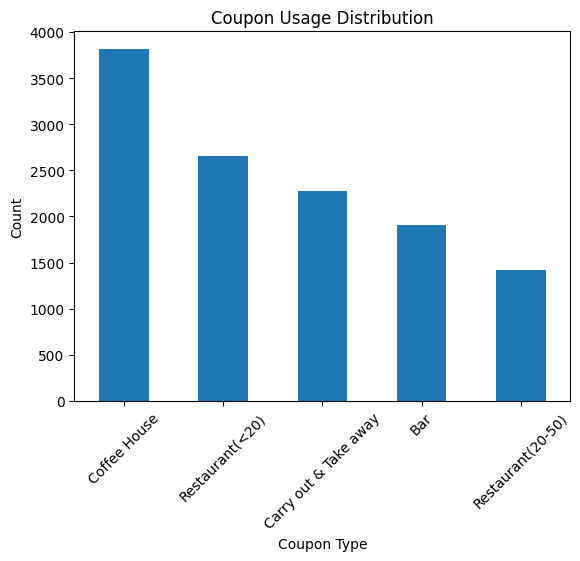

In [172]:
df['coupon'].value_counts().plot(kind='bar')
plt.title('Coupon Usage Distribution')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
#The Coupon usage distribution is clearly left-skewed, indicating that coffee house coupons are used more frequently than other types of coupons. Alternatively, it also indicates that coffee house coupons are more frequently offered or available in the dataset. Finally, below bar distibution also shows that restaurant > $20 are the least used coupons in this dataset.

6. Use a histogram to visualize the temperature column.

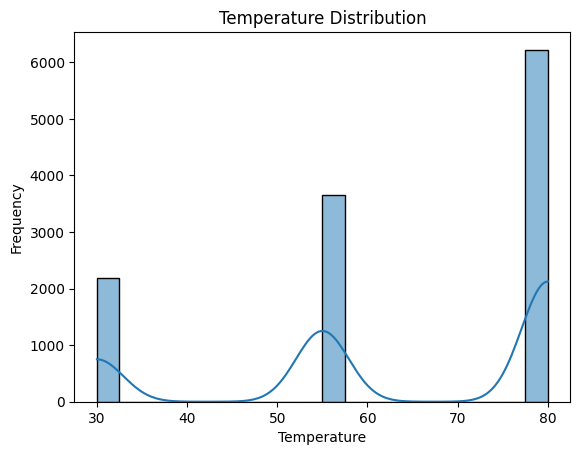

In [173]:
sns.histplot(data=df, x='temperature', bins=20, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()
#The temperature distribution is slightly right-skewed, indicating that there are more instances of higher temperatures compared to lower temperatures.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


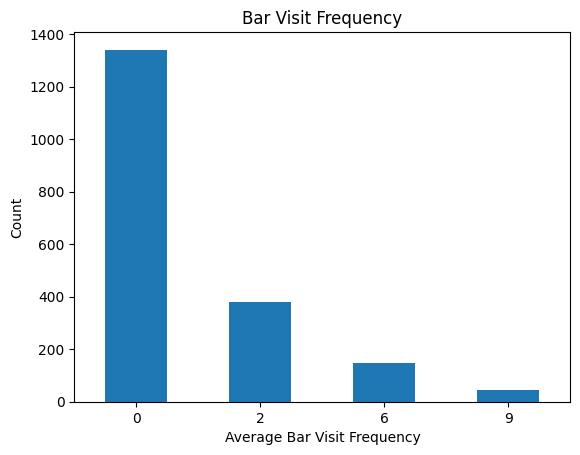

In [174]:
dfBar = df[df['coupon'] == 'Bar']
dfBar['Bar'].value_counts().plot(kind='bar')
plt.title('Bar Visit Frequency')
plt.xlabel('Average Bar Visit Frequency')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
#Most people never visited bar, followed by 1~3 per week. Very few people visit bar more than 4 times a week.

2. What proportion of bar coupons were accepted?


In [175]:
proportionBarAccepted = dfBar['Y'].mean()
print("Proportion of Bar coupons accepted : "+ proportionBarAccepted.astype(str))
#So, 41% of Bar coupons were accepted.

accepted = (dfBar['Y'] == 1).sum()
not_accepted = (dfBar['Y'] == 0).sum()
print("Accepted : " + accepted.astype(str))
print("Not accepted : " + not_accepted.astype(str))
#So, we can see that people who visit bar more frequently are 41% more likely to accept Bar coupons compared to people who went to bar 3 or fewer times a month.

Proportion of Bar coupons accepted : 0.41191845269210664
Accepted : 788
Not accepted : 1125


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


1720
193
Low bar acceptance rate : 37.27
High bar acceptance rate : 76.17


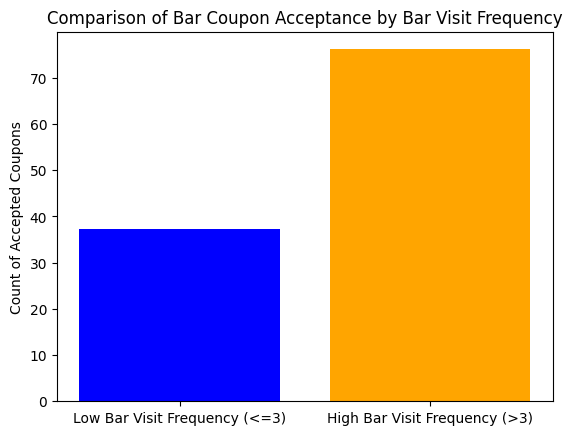

In [176]:
low_bar = dfBar[(dfBar['Bar'] <= 3)]
high_bar = dfBar[(dfBar['Bar'] > 3)]
print(len(low_bar))#Total of 1720 entries with low bar visit frequency
print(len(high_bar))#Total of 193 entries with high bar visit frequency
low_bar_acceptance = len(low_bar[(low_bar['Y'] == 1)])/len(low_bar) *100
high_bar_acceptance = len(high_bar[(high_bar['Y'] == 1)])/len(high_bar) *100
print("Low bar acceptance rate : " + str(round(low_bar_acceptance, 2)))
print("High bar acceptance rate : " + str(round(high_bar_acceptance, 2)))


counts = [low_bar_acceptance, high_bar_acceptance]
labels = ['Low Bar Visit Frequency (<=3)', 'High Bar Visit Frequency (>3)']

#Plot bar chart
plt.bar(labels, counts, color=['blue', 'orange'])
plt.ylabel('Count of Accepted Coupons')
plt.title('Comparison of Bar Coupon Acceptance by Bar Visit Frequency')
plt.show()

#It is clear from above bar chart that people with high bar visit frequency are more likely to accept Bar coupons.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


572
Over Age 25 : 403
Under Age 25 : 169


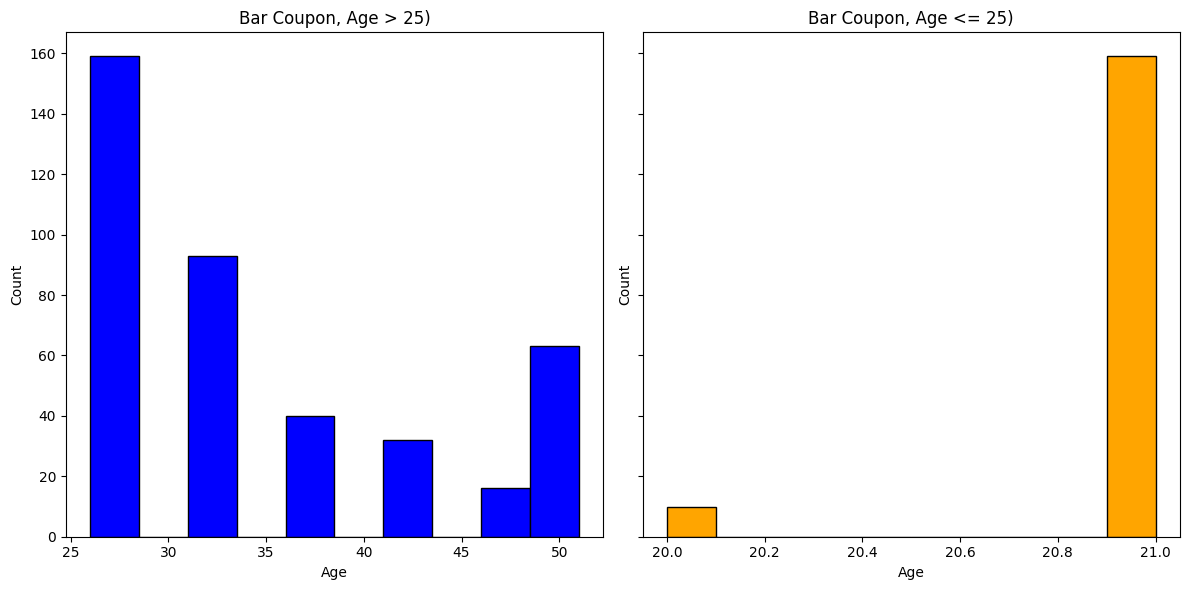

In [178]:
#Let's see if age has any effect on Bar coupon usage
barMoreThanOnce = dfBar[dfBar['Bar'] >= 2]
print(len(barMoreThanOnce))#Total of 582 entries with bar visit frequency more than once a month

over25Age = barMoreThanOnce[barMoreThanOnce['age'] > 25]
print("Over Age 25 : " + str(len(over25Age)))#Total of 1928 entries with age over 25

under25Age = barMoreThanOnce[barMoreThanOnce['age'] <= 25]
print("Under Age 25 : " + str(len(under25Age)))#Total of 0 entries with age under or equal to 25

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

#Histogram for over 25 age group
axes[0].hist(over25Age['age'], bins=10, color='blue', edgecolor='black')
axes[0].set_title('Bar Coupon, Age > 25)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

#Histogram for under or equal to 25 age group
axes[1].hist(under25Age['age'], bins=10, color='orange', edgecolor='black')
axes[1].set_title('Bar Coupon, Age <= 25)')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

#As we can see, there are very few entries with age under or equal to 25 in the dataset. So, we cannot confidently compare the acceptance rate of Bar coupons based on age group.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [ ]:
str_kids = ['Kid(s)']
df_withoutKid = barMoreThanOnce[~barMoreThanOnce['passanger'].isin(str_kids)]
#print(len(df_withoutKid))#Total of 538 entries with bar visit frequency more than once a month and with no kids as passangers.

str_occupation_fishing = ['Farming Fishing & Forestry']
df_withoutFishing = df_withoutKid[~df_withoutKid['occupation'].isin(str_occupation_fishing)]
print(len(df_withoutFishing))#Total of 530 entries with bar visit frequency more than once a month and with no kids as passangers and with no fishing occupation.
acceptance_withoutFishing = (df_withoutFishing['Y'] == 1).sum()
print("Acceptance count without Fishing occupation : " + str(acceptance_withoutFishing))
acceptanceRate_withoutFishing = acceptance_withoutFishing / len(df_withoutFishing) * 100
print("Acceptance rate without Fishing occupation : " + str(round(acceptanceRate_withoutFishing, 2)))  

530
Acceptance count without Fishing occupation : 376
Acceptance rate without Fishing occupation : 70.94


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [ ]:
marital_status_widowed = ['Widowed']
df_widowed = df_withoutKid[~df_withoutKid['maritalStatus'].isin(marital_status_widowed)]
print(len(df_widowed))
acceptance_widowed = (df_widowed['Y'] == 1).sum()
print("Acceptance count without widowed : " + str(acceptance_widowed))
acceptanceRate_widowed = acceptance_widowed / len(df_widowed) * 100
print("Acceptance rate without widowed : " + str(round(acceptanceRate_widowed, 2)))

df_under30 = barMoreThanOnce[barMoreThanOnce['age'] < 30]
print(len(df_under30))
acceptance_under30 = (df_under30['Y'] == 1).sum()
print("Acceptance count with age under 30 : " + str(acceptance_under30))
#Total of 334 entries with bar visit frequency more than once a month and age under 30.
acceptanceRate_under30 = acceptance_under30 / len(df_under30) * 100
print("Acceptance rate with age under 30 : " + str(round(acceptanceRate_under30, 2)))

df_moreThan4Times = barMoreThanOnce[barMoreThanOnce['RestaurantLessThan20'] >= 4]
print(len(df_moreThan4Times))#Total of 112 entries with bar visit frequency more than 4 times a month and age under 30.
acceptance_moreThan4Times = (df_moreThan4Times['Y'] == 1).sum()
print("Acceptance count with bar visit frequency more than 4 times a month : " + str(acceptance_moreThan4Times))
acceptanceRate_moreThan4Times = acceptance_moreThan4Times / len(df_moreThan4Times) * 100
print("Acceptance rate with bar visit frequency more than 4 times a month : " + str(round(acceptanceRate_moreThan4Times, 2)))

income_less_than_50k = [0, 1, 2, 3]
df_incomeLessThan50k = df_moreThan4Times[df_moreThan4Times['income'].isin(income_less_than_50k)]
print(len(df_incomeLessThan50k))#Total of 127 entries with bar visit frequency more than 4 times a month and income less than 50K.
acceptance_incomeLessThan50k = (df_incomeLessThan50k['Y'] == 1).sum()
print("Acceptance count with income less than 50K : " + str(acceptance_incomeLessThan50k))
acceptanceRate_incomeLessThan50k = acceptance_incomeLessThan50k / len(df_incomeLessThan50k) * 100
print("Acceptance rate with income less than 50K : " + str(round(acceptanceRate_incomeLessThan50k, 2)))



530
Acceptance count without widowed : 376
Acceptance rate without widowed : 70.94
328
Acceptance count with age under 30 : 236
Acceptance rate with age under 30 : 71.95
280
Acceptance count with bar visit frequency more than 4 times a month : 198
Acceptance rate with bar visit frequency more than 4 times a month : 70.71
127
Acceptance count with income less than 50K : 98
Acceptance rate with income less than 50K : 77.17


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
#Drivers with income less than 50K are most likely to accept Bar coupons.
#Also drivers who visited bar more than 4 times a month are more likely to accept Bar coupons.
#Also drivers under age 30 are more likely to accept Bar coupons.
#And drivers with adults passangers who are not widowed are more likely to accept Bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  